In [21]:
import cv2

In [22]:
import matplotlib.pyplot as plt

In [23]:
from PIL import Image

In [24]:
import numpy as np

In [25]:
cap = cv2.VideoCapture(0)

In [26]:
cap

<VideoCapture 00000000087F0450>

In [27]:
ret, frame = cap.read()

In [28]:
w = 640
h = 480

In [29]:
ret

True

In [30]:
plt.imshow(frame)

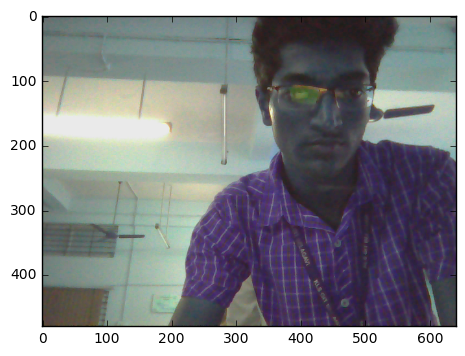

In [31]:
plt.show()

In [32]:
cap.release()

In [33]:
np.shape(frame)

(480, 640, 3)

In [34]:
img = Image.fromarray(frame)

In [35]:
img=img.convert('L')

In [36]:
np.shape(img)

(480, 640)

In [37]:
img = np.asarray(img)

In [38]:
faces = cv2.CascadeClassifier('haarcascade_eye.xml')

In [39]:
detected = faces.detectMultiScale(img, 1.3, 5)

In [40]:
pupilFrame = frame
pupilO = frame
windowClose = np.ones((5,5),np.uint8)
windowOpen = np.ones((2,2),np.uint8)
windowErode = np.ones((2,2),np.uint8)

In [41]:
for (x,y,w,h) in detected:
    cv2.rectangle(frame, (x,y), ((x+w),(y+h)), (0,0,255),1)	
    cv2.line(frame, (x,y), ((x+w,y+h)), (0,0,255),1)
    cv2.line(frame, (x+w,y), ((x,y+h)), (0,0,255),1)
    pupilFrame = cv2.equalizeHist(frame[y+(h*.25):(y+h), x:(x+w)])
    pupilO = pupilFrame
    ret, pupilFrame = cv2.threshold(pupilFrame,55,255,cv2.THRESH_BINARY)		#50 ..nothin 70 is better
    pupilFrame = cv2.morphologyEx(pupilFrame, cv2.MORPH_CLOSE, windowClose)
    pupilFrame = cv2.morphologyEx(pupilFrame, cv2.MORPH_ERODE, windowErode)
    pupilFrame = cv2.morphologyEx(pupilFrame, cv2.MORPH_OPEN, windowOpen)

    #so above we do image processing to get the pupil..
    #now we find the biggest blob and get the centriod

    threshold = cv2.inRange(pupilFrame,250,255)		#get the blobs
    contours, hierarchy = cv2.findContours(threshold,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

    #if there are 3 or more blobs, delete the biggest and delete the left most for the right eye
    #if there are 2 blob, take the second largest
    #if there are 1 or less blobs, do nothing

    if len(contours) >= 2:
        #find biggest blob
        maxArea = 0
        MAindex = 0			#to get the unwanted frame 
        distanceX = []		#delete the left most (for right eye)
        currentIndex = 0 
        for cnt in contours:
            area = cv2.contourArea(cnt)
            center = cv2.moments(cnt)
            cx,cy = int(center['m10']/center['m00']), int(center['m01']/center['m00'])
            distanceX.append(cx)	
            if area > maxArea:
                maxArea = area
                MAindex = currentIndex
            currentIndex = currentIndex + 1

            del contours[MAindex]		#remove the picture frame contour
            del distanceX[MAindex]

    eye = 'right'

    if len(contours) >= 2:		#delete the left most blob for right eye
        if eye == 'right':
            edgeOfEye = distanceX.index(min(distanceX))
        else:
            edgeOfEye = distanceX.index(max(distanceX))	
        del contours[edgeOfEye]
        del distanceX[edgeOfEye]

    if len(contours) >= 1:		#get largest blob
        maxArea = 0
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > maxArea:
                maxArea = area
                largeBlob = cnt

    if len(largeBlob) > 0:	
        center = cv2.moments(largeBlob)
        cx,cy = int(center['m10']/center['m00']), int(center['m01']/center['m00'])
        cv2.circle(pupilO,(cx,cy),5,255,-1)

In [42]:
#show picture
cv2.imshow('frame',pupilO)
cv2.imshow('frame2',pupilFrame)

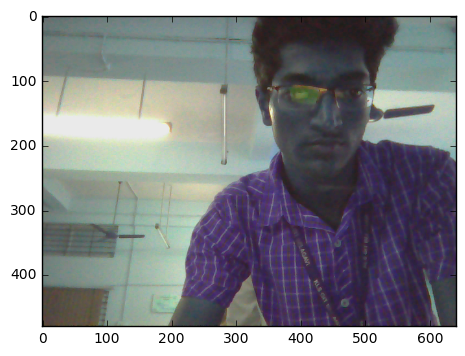

In [43]:
plt.imshow(pupilO)
plt.show()

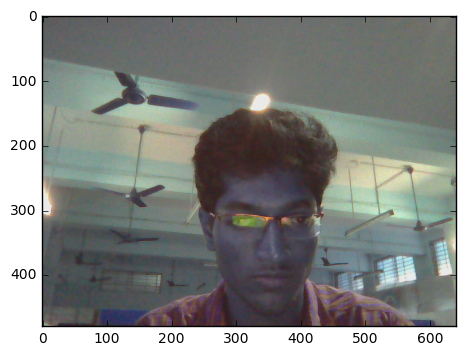

In [145]:
plt.imshow(pupilFrame)
plt.show()